In [2]:
### imports ###
import pygmt
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.image as mpimg 
from mpl_toolkits.basemap import Basemap

import pandas as pd

%matplotlib inline
%matplotlib widget

In [ ]:
# Major tectonic blocks and faults are marked by black lines (after Styron et al. (2010) and Taylor and An Yin (2009))
# https://github.com/HimaTibetMap/HimaTibetMap/tree/master
# Styron, R., Taylor, M., and Okoronkwo, K., 2010, HimaTibetMap-1.0: new ‘web-2.0’ online database of active structures from the Indo-Asian collision, Eos, vol.91 no. 20.
# Taylor, Michael, and An Yin, 2009, "Active structures of the Himalayan-Tibetan orogen and their relationships to earthquake distribution, contemporary strain field, and Cenozoic volcanism." Geosphere vol. 5, no. 3, pp 199-214.
# gem_active_faults.gmt https://github.com/GEMScienceTools/gem-global-active-faults
# Slab contours are from the slab model of Hayes et al. (2018).
# Hayes, G., 2018, Slab2 - A Comprehensive Subduction Zone Geometry Model: U.S. Geological Survey data release, https://doi.org/10.5066/F7PV6JNV. 

# Seismicity from the Harvard CMT cffatalogue (Dziewonski et al. (1981), Ekstr ̈om et al. (2012), https://www.globalcmt.org/.
# InSAR DURATION ONLY 20160309 20240710


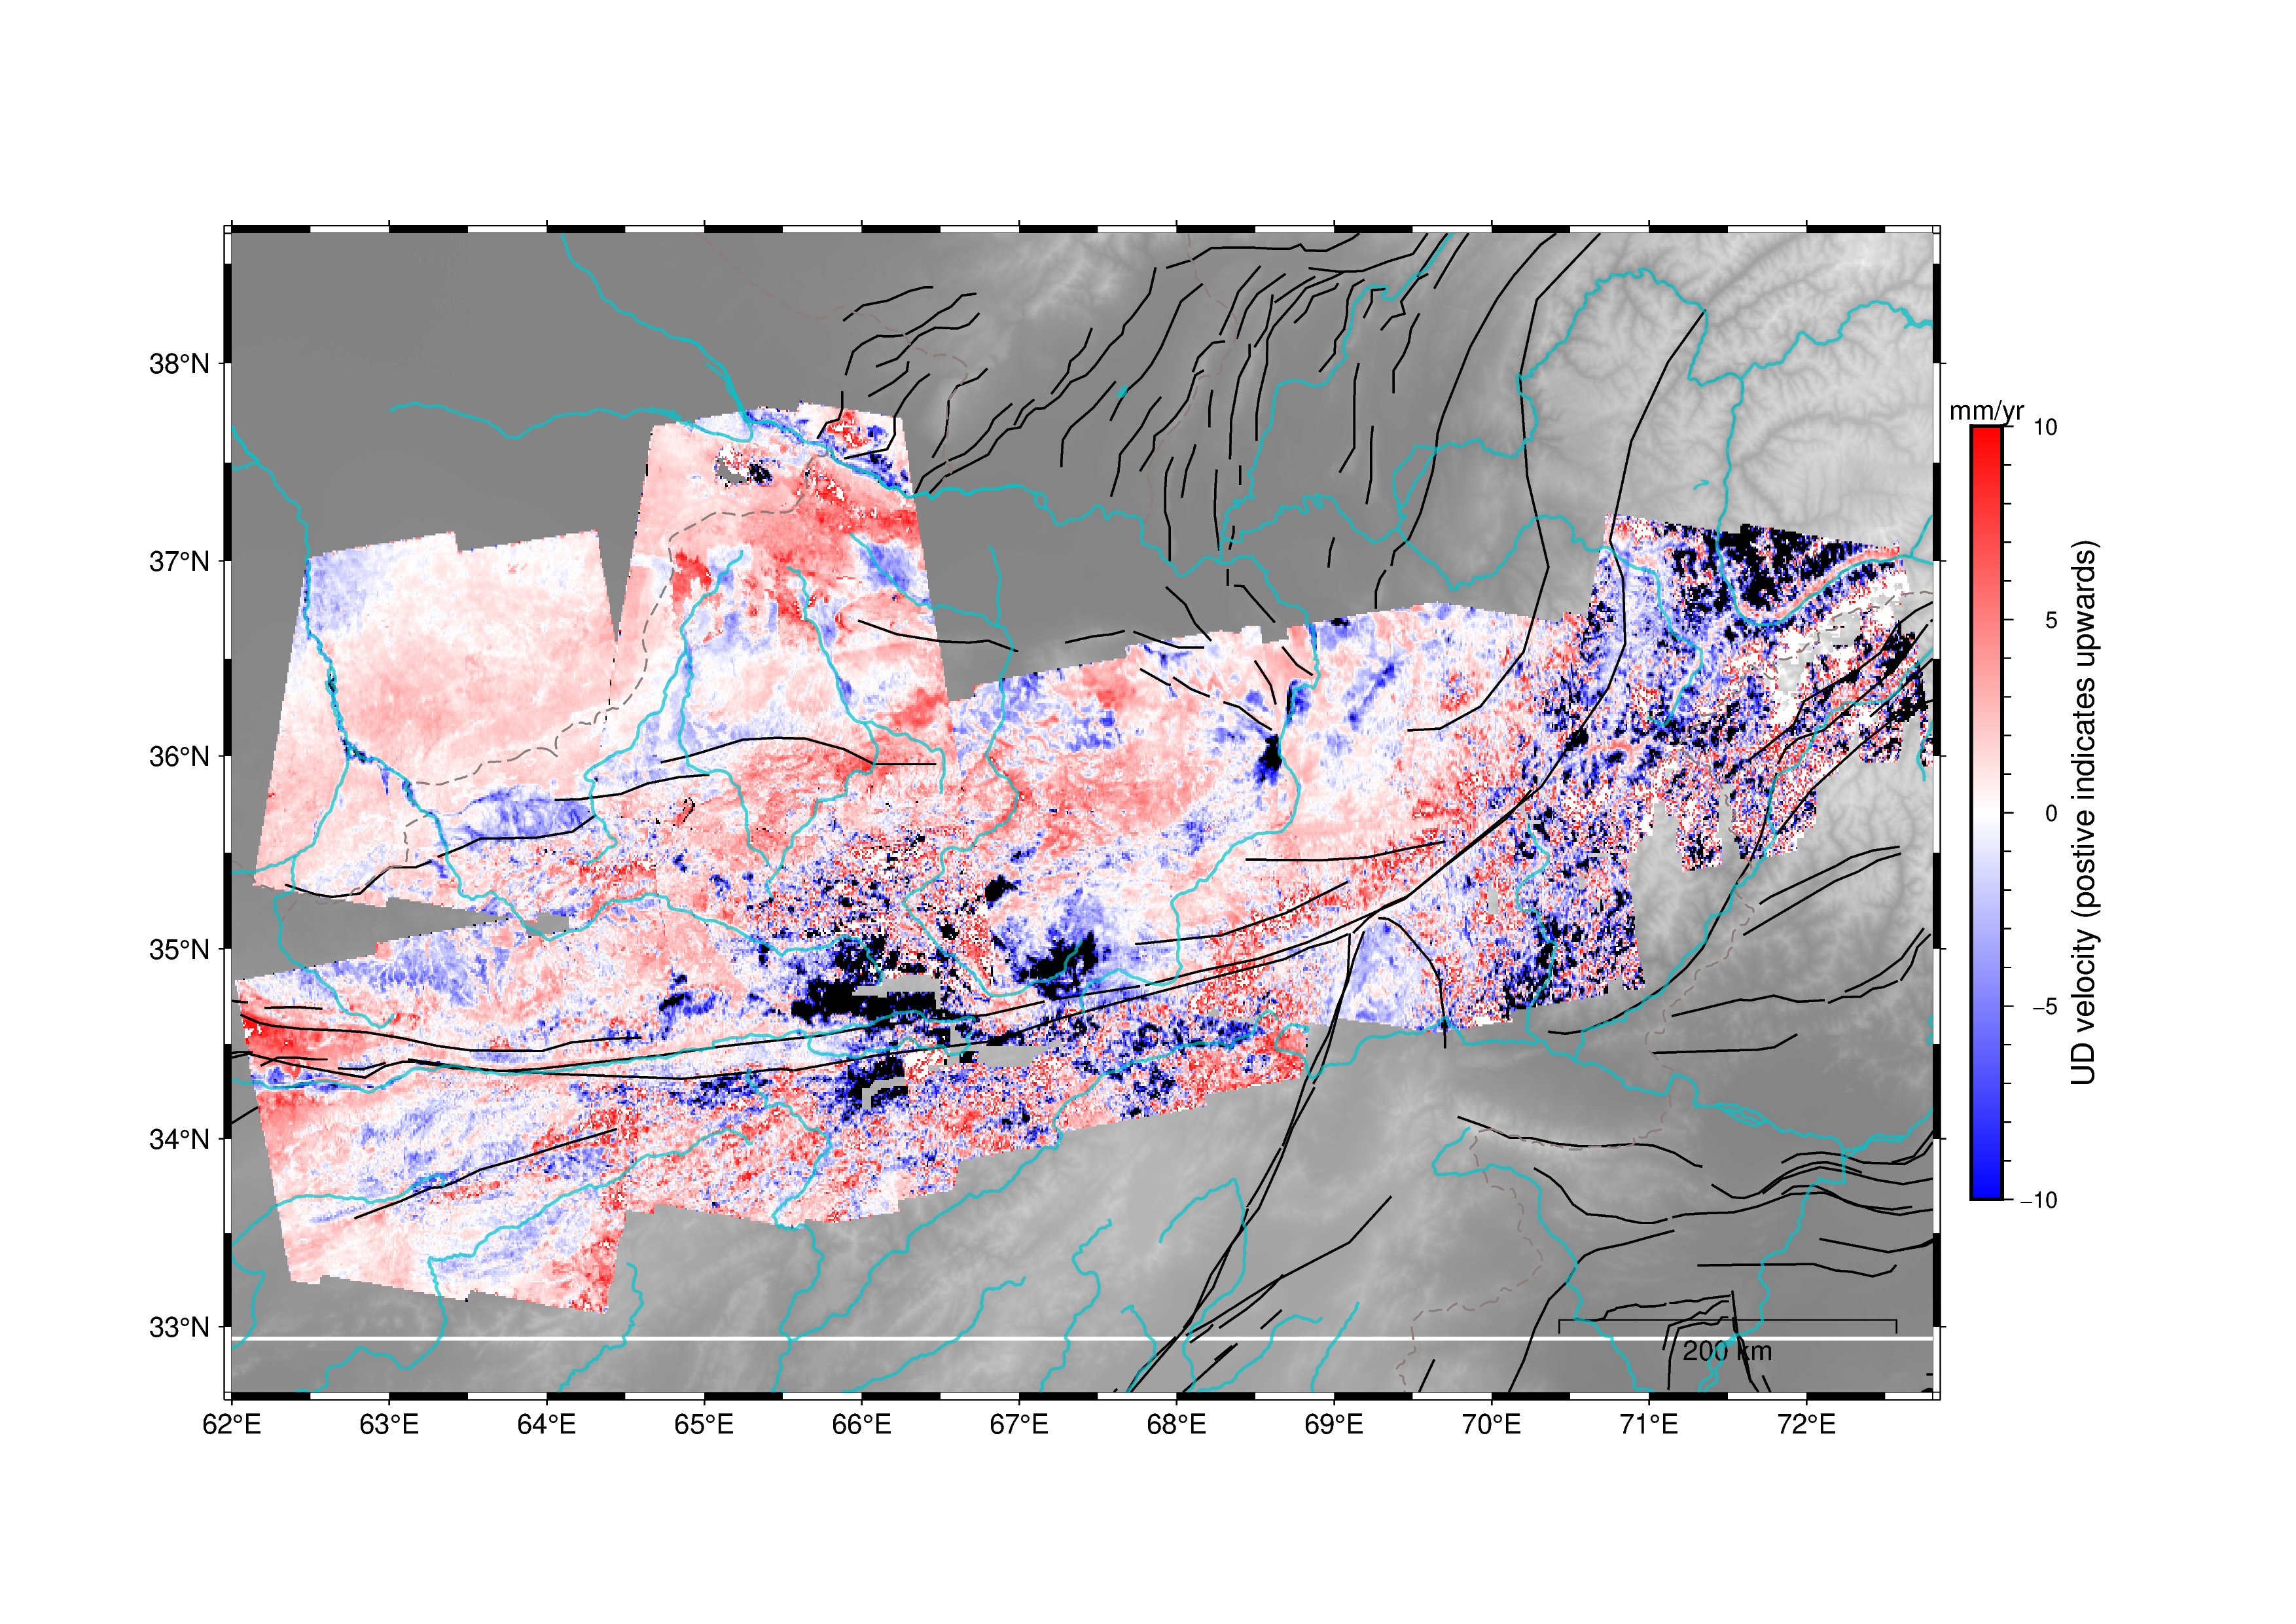

In [4]:
### GMT basemap ###

###########################################
## Specify coords
# llcrnrlat,llcrnrlon, urcrnrlat, urcrnrlon
# are the lat/lon values of the lower left and upper right corners of the map

llcrnrlon=62 # lower left corner longitude 
llcrnrlat=32.65 # lower left corner latitude
urcrnrlon=72.8 # upper right corner longitude
urcrnrlat=38.65 # upper right corner latitude


proj_scale_w = 22 # specify projection scale (width)
proj_scale_unit = "c" # choose between c (cm) and i (inches)
# 17.78c = 7i


meca_trans = 22 # meca transparency
meca_scale = "0.4c" # meca scale

x_y_shift = '3c'
# InSAR_tif =
# InSAR_NetCDF =


###########################################

centerlon = (urcrnrlon - llcrnrlon)/2 + llcrnrlon # midpoints
centerlat = (urcrnrlat - llcrnrlat)/2 + llcrnrlat
region=[llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat]

fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="fancy", FONT="Helvetica") # figure config (borders)

pygmt.config(MAP_FRAME_WIDTH="0.1c") # DONT do PS_MEDIA="A4" this somehow breaks the cyl equidistant resizing

fig.coast(region=[0, 29.7, 0, 21], projection="Q29.7c", frame=False, land="white")
# this should be A4
# Equidistant Cylindrical Projection (Plate Carrée)
# https://www.pygmt.org/latest/projections/cyl/cyl_equidistant.html


fig.shift_origin(xshift="3c", yshift="3c") # does NOT include border width


fig.coast(region=region,\
        projection="M%s/%s/%s%s" % (centerlon, centerlat, proj_scale_w, proj_scale_unit),\
        water="white", land="grey", shorelines="1/0.5p",\
        frame=["WSne", "a1f0.5"])

        # Mercator
        # a2f0.5 --> major ticks every 2 and minor ticks every 0.5

grid = pygmt.datasets.load_earth_relief("30s", registration="gridline", region=region)

fig.grdimage(grid=grid, cmap="bin/seabluelandgrey.cpt")
# fig.grdimage(grid=grid, cmap="geo")

#######################
## plotting UD
pygmt.makecpt(output="bin/polar_LOSdecomp", series=[-10, 10], cmap="bin/polar.cpt")
                    # redefine scale + inverse
                    # stored in local sesh
                                        
fig.grdimage(grid="bin/UD_mskd_gdalmerge2.tif"\
                , nan_transparent = True, transparency = 0, cmap="bin/polar_LOSdecomp")

#######################

## plotting faults
# https://www.pygmt.org/dev/gallery/lines/linefronts.html
fig.plot(data="bin/gem_active_faults.gmt", pen=f"0.7p,black") # gem

fig.coast(map_scale="g71.5/33+w200k", shorelines="1/0.5p", borders="1/0.6p, mistyrose4,-")
fig.coast(lakes="turquoise3", rivers="a/1p,turquoise3,4_solid", water="turquoise3", transparency=30) # want water above national borders


## legends and stuff

fig.colorbar(
    cmap="bin/polar_LOSdecomp", frame=["xa5f1+lUD velocity (postive indicates upwards)", "y+lmm/yr"],
    # offset (+o) by 0.5 cm horizontally and 0.8 cm vertically from anchor
    # point, and plotted horizontally (+h)
    position="JCR+o0.5/0c+w10c"
)

fig.show()
fig.savefig("frame_merge_map_UD_A4w22cmborder3cm.png")

In [ ]:
# basic test w mapproject first

import pygmt

### Making a demo pyGMT basemap ###

###########################################
## Specify coords
# llcrnrlat,llcrnrlon, urcrnrlat, urcrnrlon
# are the lat/lon values of the lower left and upper right corners of the map

llcrnrlon=66 # lower left corner longitude 
llcrnrlat=34 # lower left corner latitude
urcrnrlon=78 # upper right corner longitude
urcrnrlat=41 # upper right corner latitude


proj_scale_w = 18 # specify projection scale (width)
proj_scale_unit = "c" # choose between c (cm) and i (inches)
# 17.78c = 7i
###########################################

centerlon = (urcrnrlon - llcrnrlon)/2 + llcrnrlon # midpoints
centerlat = (urcrnrlat - llcrnrlat)/2 + llcrnrlat
region=[llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat]

grid = pygmt.datasets.load_earth_relief("30s", registration="gridline", region=region)


fig = pygmt.Figure()
# pygmt.config(MAP_FRAME_TYPE="plain") # figure config (borders)
fig.coast(region=region,\
          projection="M%s/%s/%s%s" % (centerlon, centerlat, proj_scale_w, proj_scale_unit),\
          water="white", land="grey", shorelines="1/0.5p")

          # Mercator
          # a2f0.5 --> major ticks every 2 and minor ticks every 0.5

fig.grdimage(grid=grid, cmap="elevation")


## plotting faults
# https://www.pygmt.org/dev/gallery/lines/linefronts.html
fig.plot(data="bin/HimaTibetMap.gmt", pen=f"0.7p,black") # all faults

fig.show()
fig.savefig("test2.png")

In [ ]:
## test
from IntPyGMT import mapproject

def interactive_pygmt_test(png_path, llcrnrlat, urcrnrlat, llcrnrlon, urcrnrlon):
    '''
    Creates an interactive map from a borderless pyGMT png where you can click to retrieve coordinates.

    Parameters:
        png_path (str): path to the borderless pyGMT map
        llcrnrlon (float): lower left corner longitude
        llcrnrlat (float): lower left corner latitude
        urcrnrlon (float): upper right corner longitude
        urcrnrlat (float): upper right corner latitude
        grid_freq (float): grid frequency (degrees)

    '''

    # determine image dimension
    img = Image.open(png_path)
    width, height = img.size # (width,height) tuple in pixels
    DPI_horz, DPI_vert = img.info.get('dpi')

    assert DPI_horz == DPI_vert

    fig = plt.figure(figsize=(width/DPI_horz, height/DPI_horz))
    ax1 = plt.subplot(111)
    '''
    need to fix as this sets figure size not subplot size --> what to do with multiple subplots eg timeseries
    aspect ratio is kept the same
    '''
    
    # plotting pygmt png image in bottom layer
    img = mpimg.imread(png_path)
    plt.imshow(img, origin='upper')


    ################
    # mapproject test w Mercator

    centerlon = (urcrnrlon - llcrnrlon)/2 + llcrnrlon # midpoints
    centerlat = (urcrnrlat - llcrnrlat)/2 + llcrnrlat
    region=[llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat]


    def pos_to_lonlat(x, y):
      lon, lat = mapproject(region=region, projection="M%s/%s/%s%s" % (centerlon, centerlat, width/DPI_horz, "i"),\
                 I=True, x=x, y=y)
 
      return lon, lat
    

    pos = [] # in format [[None, None], [x, y], [x, y], ...]
    lonlat = []

    def onclick(event):
      pos.append([event.xdata, event.ydata])

      lon, lat = pos_to_lonlat(pos[-1][0], pos[-1][1]) # pos[-1] represents last click (list with x, y)
      lonlat.append([lon, lat]) # converts x y to lon lat and appends

      ax1.set_title(f'Click {len(pos)}: {lon}, {lat}') 

    
    cid=fig.canvas.mpl_connect('button_press_event', onclick)

    plt.show()

    return

%matplotlib widget
interactive_pygmt_test("frame_merge_map_UD.png", llcrnrlat, urcrnrlat, llcrnrlon, urcrnrlon)

NameError: name 'llcrnrlat' is not defined

In [ ]:
fig = pygmt.Figure()

fig.coast(region=region,\
        projection="M%s/%s/%s%s" % (centerlon, urcrnrlat, proj_scale_w + 2, proj_scale_unit),\
        land="white")

fig.show()

In [ ]:
from IntPyGMT import mapproject # import mapproject


In [ ]:
! ls /opt/anaconda3/envs/pygmt/lib/python3.12/site-packages/IntPyGMT

IntPyGMT_overlay.py __init__.py         __pycache__         mapproject.py
